<a href="https://colab.research.google.com/github/PraneethPagadala3/FML-Lab/blob/main/univariate_on_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.Loading the dataset

In [ ]:
data=pd.read_csv("company_data.csv") 

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


choosing T.V because it is relative to sales(output)

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
x=data["TV"].values
y=data["Sales"].values
x
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [ ]:
#training data
from sklearn import model_selection
xtr,xte,ytr,yte=model_selection.train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
xtr.shape

(140,)

In [ ]:
x_r=xtr.reshape(-1,1)
y_r=ytr.reshape(-1,1)
x_r.shape,xtr.shape

((140, 1), (140,))

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
reg.fit(x_r,y_r)


LinearRegression()

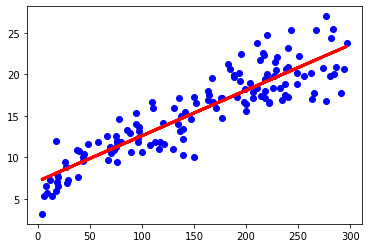

In [ ]:
plt.scatter(x_r,y_r,color='blue')
plt.plot(x_r,reg.predict(x_r),color='red',linewidth=3)

In [ ]:
X=xte.reshape(-1,1)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
y_pred=reg.predict(X)
print(f'MAE = {mean_absolute_error(yte, y_pred)}')
print(f'MSE = {mean_squared_error(yte, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(yte, y_pred))}')
print(f'R_2 = {r2_score(yte, y_pred)}')

MAE = 1.8639438916550555
MSE = 5.569539193467241
RMSE = 2.3599871172248466
R_2 = 0.8150168765722069
